## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [74]:
! git clone https://www.github.com/DS3001/kmc

fatal: destination path 'kmc' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**1. Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.**

In [75]:
df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')

# rename columns
df['price'] = df['Price']
df['beds'] = df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

df = df.loc[:,['price','beds','n_reviews','score']]

print(df.shape)
df.describe()

(30478, 4)


,beds,n_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [76]:
# no null values to remove from price
print(df['price'].isna().sum())

0


In [77]:
# remove comma separators from price
df['price'].value_counts()
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: price, dtype: float64

In [78]:
# remove null values from beds
print(df['beds'].isna().sum())

85


In [79]:
df['beds'] = df['beds'].fillna(1)
df['beds'].describe()

count    30478.000000
mean         1.528611
std          1.014327
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: beds, dtype: float64

In [80]:
# nothing to clean from reviews
print(df['n_reviews'].isna().sum())

0


In [81]:
# remove null values from score
print(df['score'].isna().sum())

8323


In [82]:
df['score'] = df['score'].dropna()
df['score'].describe()

count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: score, dtype: float64

**2. Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).**

In [83]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

Z = df.drop('price',axis=1)
Z = Z.apply(maxmin)

**3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.**

In [84]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z) # Fit the emodel
Z['cluster'] = model.labels_

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

**2. Make scatterplots of the  (𝑋1,𝑋2)  points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?**

* As the noise level increases, the data clusters become less condensed and start to come closer togther and mix with the others. From noise=0.125 to 0.5, the cluster are very distinct (noise=0.5 clusters are touching eachtoher but not mixed).  However, past that, at noise=1.0 and 2.0, the clusters are very difficult to distinguish.

<Axes: xlabel='x1', ylabel='x2'>

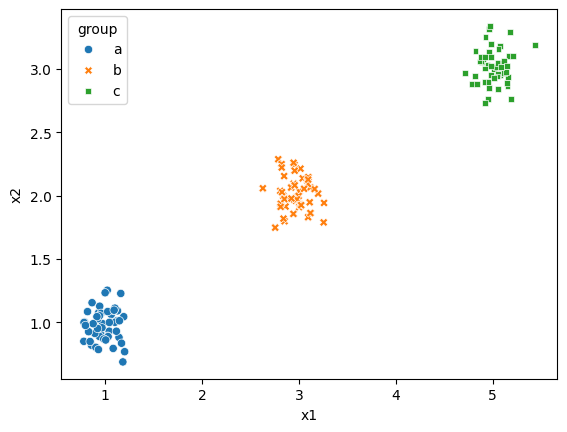

In [ ]:
sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

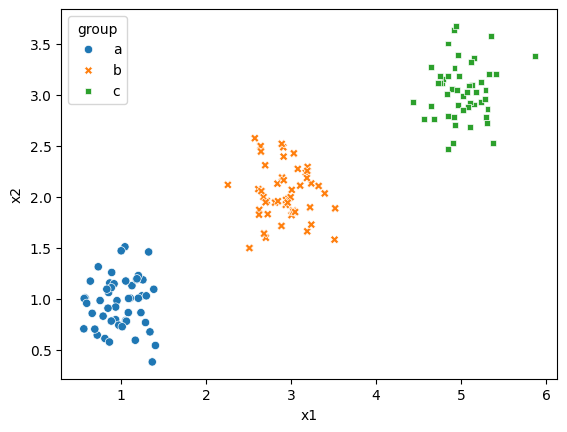

In [ ]:
sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

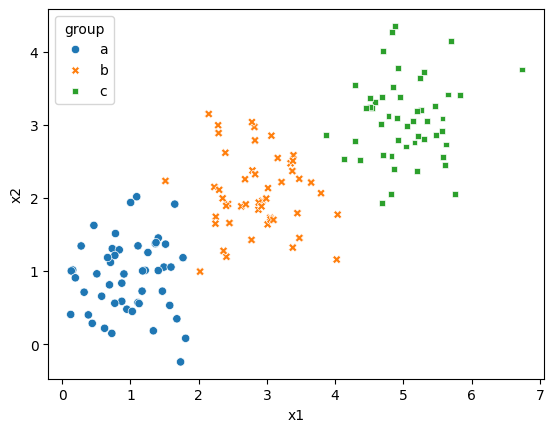

In [ ]:
sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

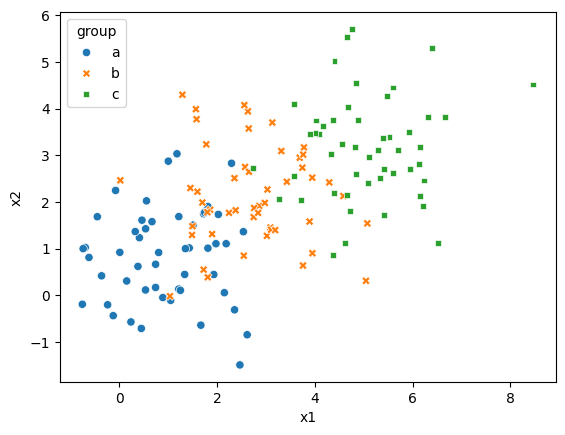

In [ ]:
sns.scatterplot(data=df1_0,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

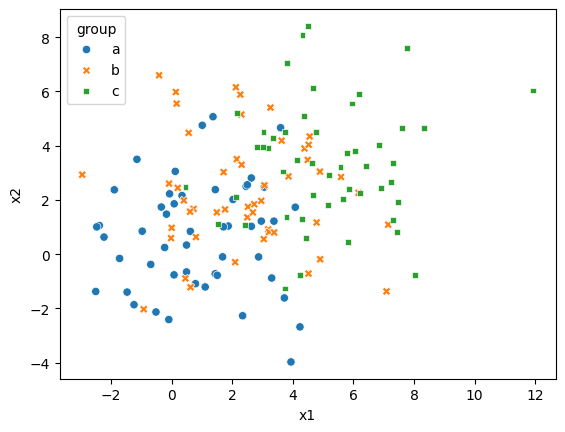

In [ ]:
sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group',style='group')

**3. Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  𝑘 .**

* As the noise level increases, the clarity of an elbow decreases. From noise=0.125 to 0.5, the elbows are clearly at k=3 with a sharp turn occuring there.  However, past that, at noise=1.0 and 2.0, it seems that the elbow may have shifted to k=2 or may not even exist.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data):
  X = data.loc[ : , ['x1','x2'] ]
  X = X.apply(maxmin)

  k_bar = 10
  k_grid = np.arange(1,k_bar+1)
  SSE = np.zeros(k_bar)
  for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

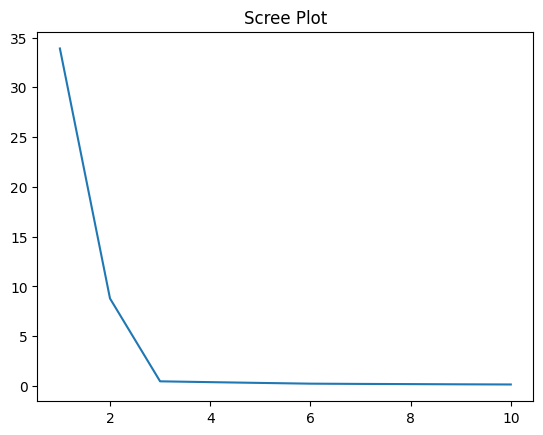

In [ ]:
scree(data = df0_125)

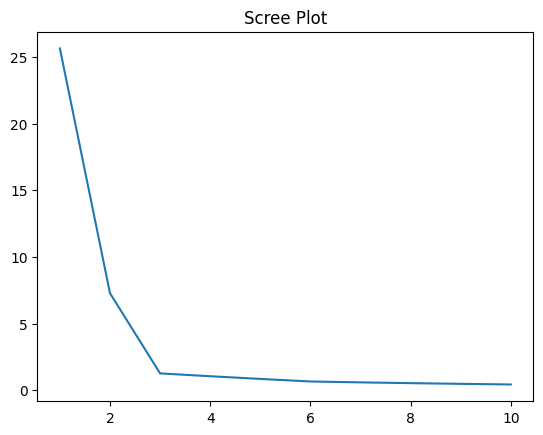

In [ ]:
scree(data = df0_25)

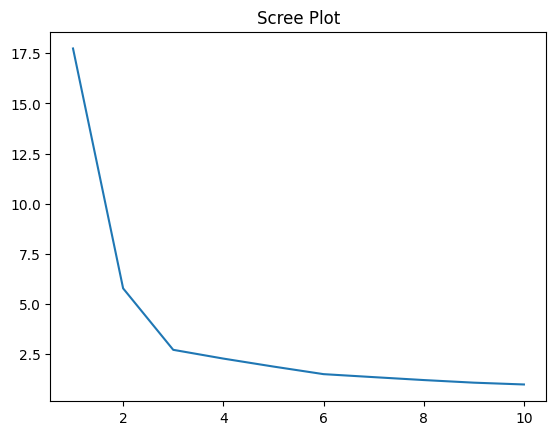

In [ ]:
scree(data = df0_5)

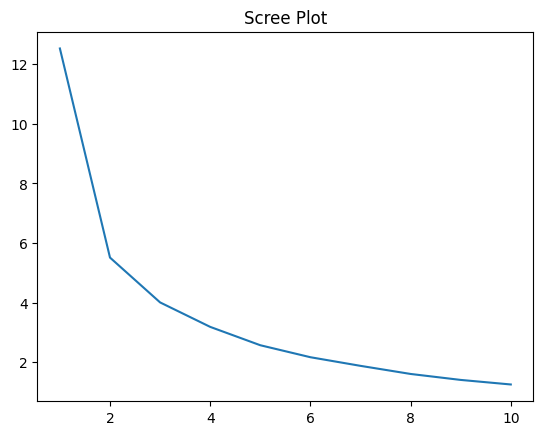

In [ ]:
scree(data = df1_0)

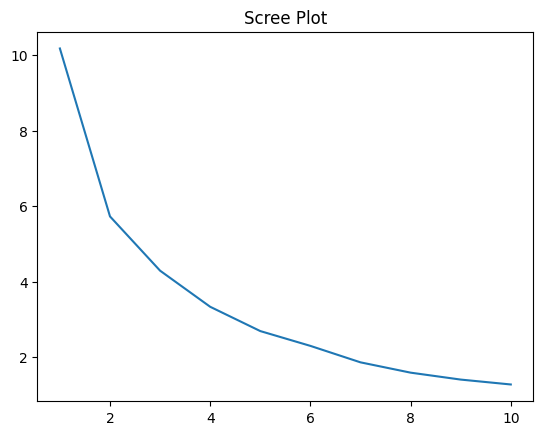

In [ ]:
scree(data = df2_0)

**4. Explain the intuition of the elbow, using this numerical simulation as an example.**

* The best k is found where the reduction in SSE from k-1 to k is significally lower than from k to k+1. This means that the marginal benefit of an additional cluster is small, and increasing it further would not improve the fit that much more. Looking at question 2, if the groups are very clear and separate, the marginal benefit of adding a cluster is large is there will be a big drop in SSE. However, as the noise increases and the groups continues to spread, this benefit will decrease. Connecting that to question 3, a very clear cluster will show a very distinct elbow. On the other hand, scattered points will not return a clear elbow but rather a smoother line.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?